# Unpack CIFAR-10

1. Write a directory for each unique label
2. Iterate through the data batches doing each of below
3. Grab dict.data, dict.filenames, dict.labels 
4. For every image in a batch save each file to it's respective directory

In [1]:
import os
import numpy as np
import shutil

%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
label_dict = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

batch_list = ['data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5']
root = '../../data/cifar-10-batches-py/'
for batch in batch_list:
    file = os.path.join(root,batch)
    break

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
batch_dict = unpickle(file)

In [5]:
filenames = batch_dict[b'filenames']
filenames = [file.decode('ascii') for file in filenames]

In [6]:
labels = batch_dict[b'labels']
label_set = [label for label in set(labels)]

In [7]:
data = batch_dict[b'data']

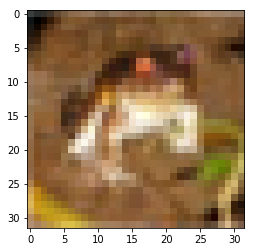

In [8]:
# Just for notebook:
i=0
target_img = data[i]
target_img = np.transpose(np.reshape(target_img,(3, 32,32)), (1,2,0))
plt.imshow(target_img)

In [19]:
root_write = '../../data/cifar-10'

if os.path.exists(root_write):
    shutil.rmtree(root_write)
os.makedirs(root_write)

for label in label_set:
    label_dir = write_path = os.path.join(root_write,label_dict[label])
    os.makedirs(label_dir)

In [20]:
for idx in range(0,data.shape[0]):
    
    filename = filenames[idx]
    label = label_dict[labels[idx]]
    img = data[idx]
    img = np.transpose(np.reshape(img,(3, 32,32)), (1,2,0))
    
    write_path = os.path.join(root_write,label,filename)
    plt.imsave(write_path,img)
    
    print(write_path)
    break

../../data/cifar-10/frog/leptodactylus_pentadactylus_s_000004.png
